In [1]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor0.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

In [4]:
sensor.head()

,sensor,con,spl,date,time
0,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00
1,sensor_0,2748.28875,81.467436,2016-06-21,04:00:00
2,sensor_0,2720.35125,80.020600,2016-06-21,08:00:00
3,sensor_0,2443.72875,76.525876,2016-06-21,12:00:00
4,sensor_0,2717.49625,80.020600,2016-06-21,16:00:00


C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  from ipykernel import kernelapp as app


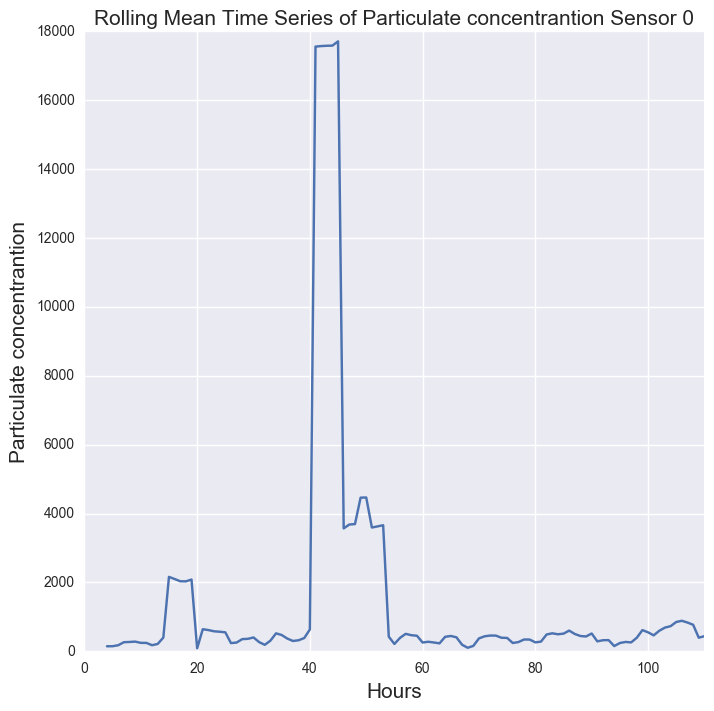

In [5]:
plt.figure(figsize=(8,8))
pd.stats.moments.rolling_std(sensor.con,5).plot()
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Particulate concentrantion", fontsize=15)
plt.title('Rolling Mean Time Series of Particulate concentrantion Sensor 0', fontsize=15)

**Fig 1 **: Time Series after the rolling mean technique was applied of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 0.

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  from ipykernel import kernelapp as app


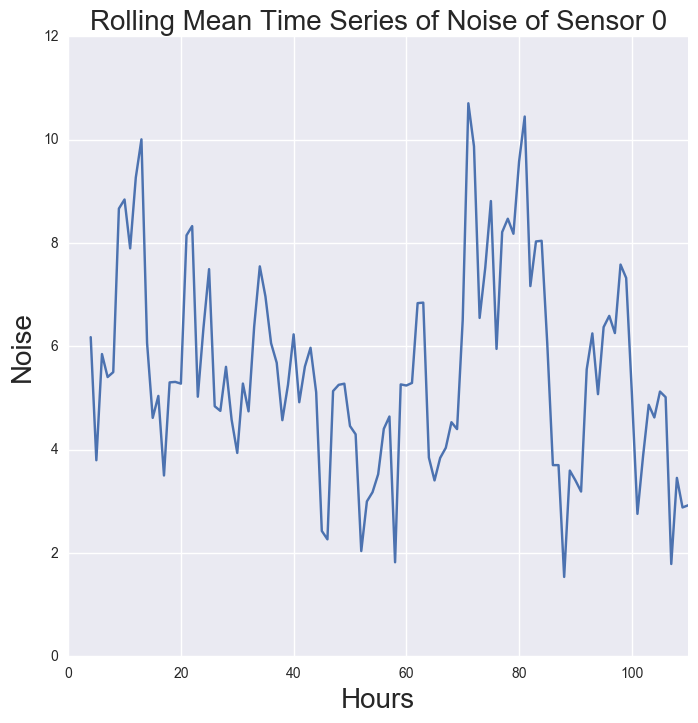

In [18]:
plt.figure(figsize=(8,8))
pd.stats.moments.rolling_std(sensor.spl,5).plot()
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise", fontsize=20)
plt.title('Rolling Mean Time Series of Noise of Sensor 0', fontsize=20)

**Fig 2**: Time Series after the rolling mean technique was applied of Noise (db) by hour measured by sensor 0.

In [7]:
# to see if it is stacionary

In [8]:
sm.tsa.adfuller(sensor.con)

(-10.030061615539134,
 1.5937400827149135e-17,
 0L,
 110L,
 {'1%': -3.4912451337340342,
  '10%': -2.5809876033057852,
  '5%': -2.8881954545454547},
 1899.5177420736595)

As the number -10.030061615539134 is more negative than the alphas so the null hypothesis is reject what does mean is that it was generated by stacionary process.

C:\Users\enrique\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


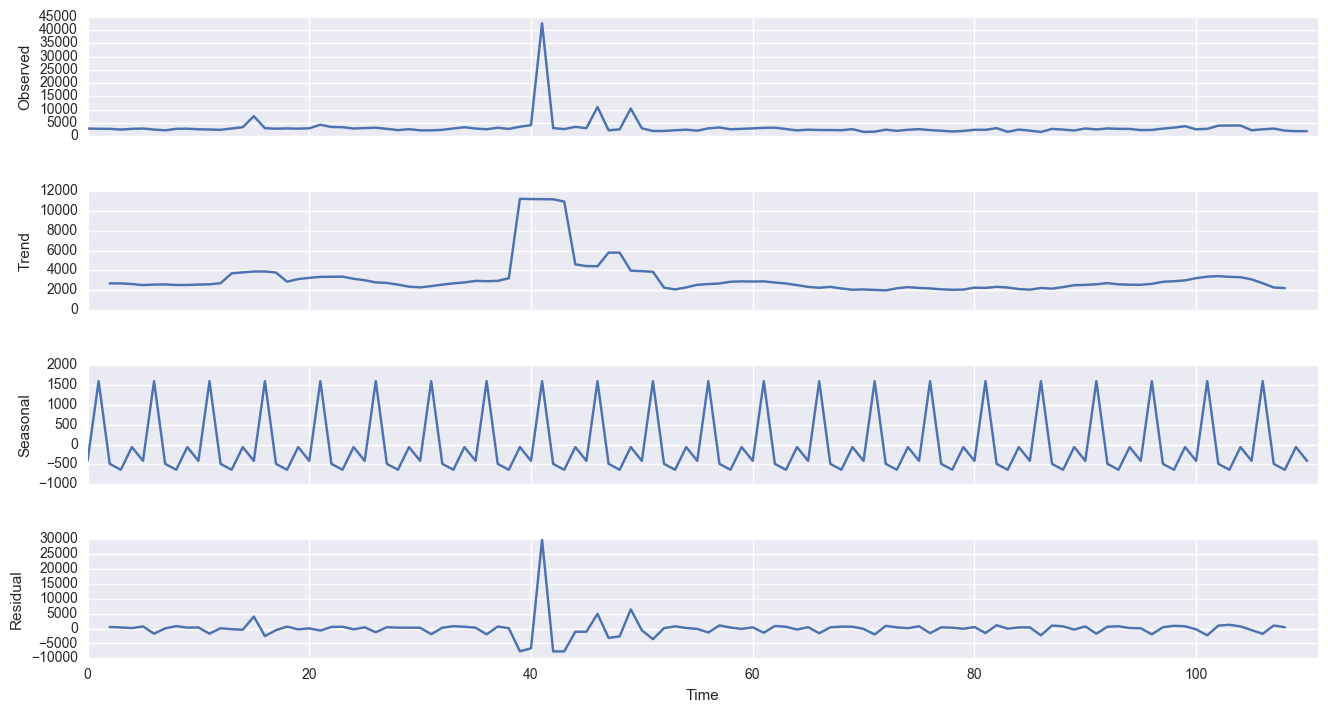

In [9]:
data_con = np.array(sensor.con)
decomposition = sm.tsa.seasonal_decompose(data_con, freq=5)
fig = plt.figure(figsize=(10,10)) 
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
plt.show()

**Fig 3 **: Descomposition of trends of the time of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 0.

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

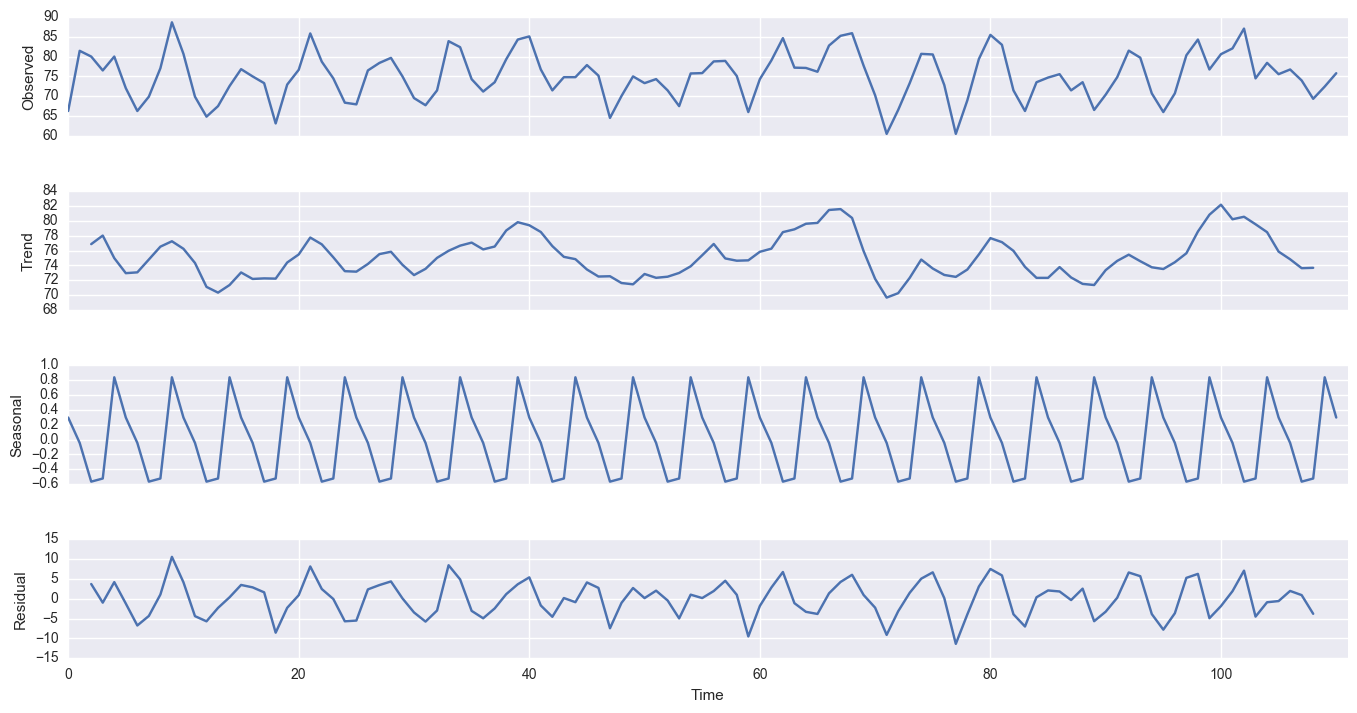

In [11]:
data_spl = np.array(sensor.spl)
decomposition = sm.tsa.seasonal_decompose(data_spl, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 4 **: Descomposition of trends of the time of noise (particle count per 0.01 cubic feet) by hour measured by sensor 0.

In [12]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [13]:
data_con_date = np.array(sensor_con_date.con)

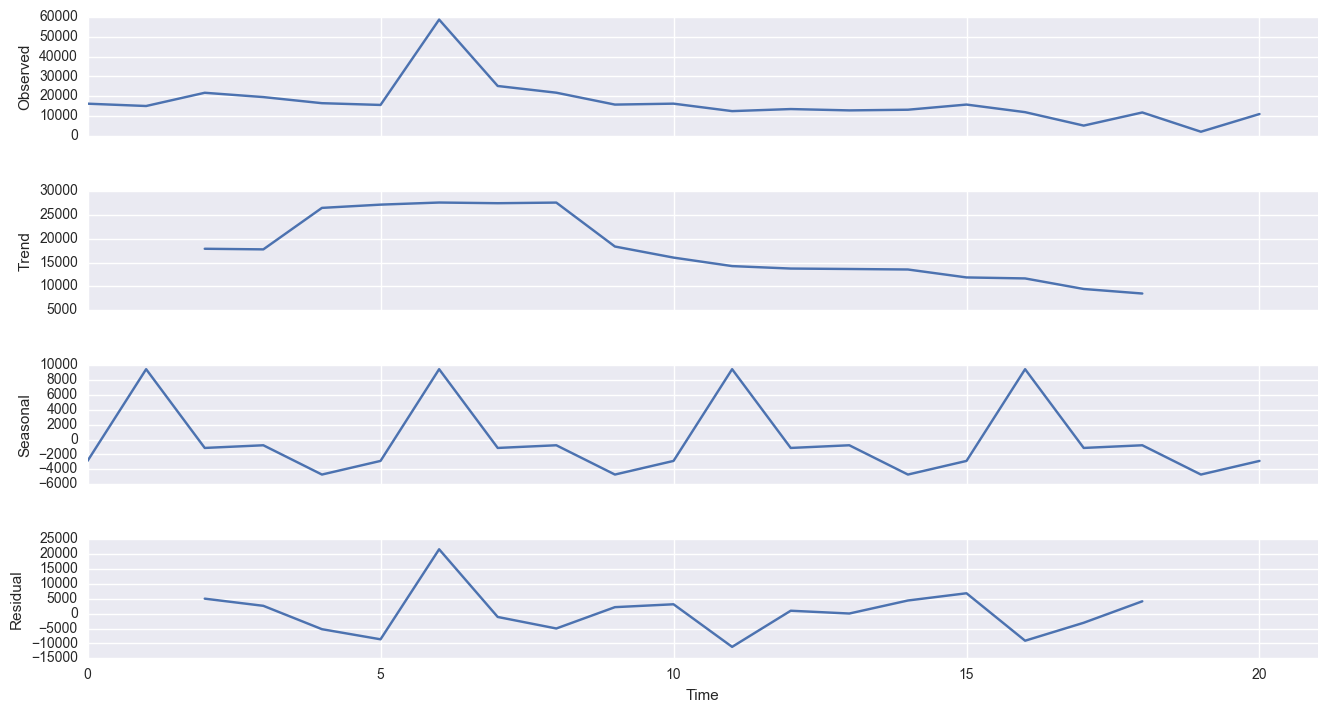

In [14]:
decomposition = sm.tsa.seasonal_decompose(data_con_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 5 :** Descomposition of trends of the time of Particulate Concentrantion (particle count per 0.01 cubic feet) by days measured by sensor 0.

In [15]:
data_spl_date = np.array(sensor_spl_date.spl)

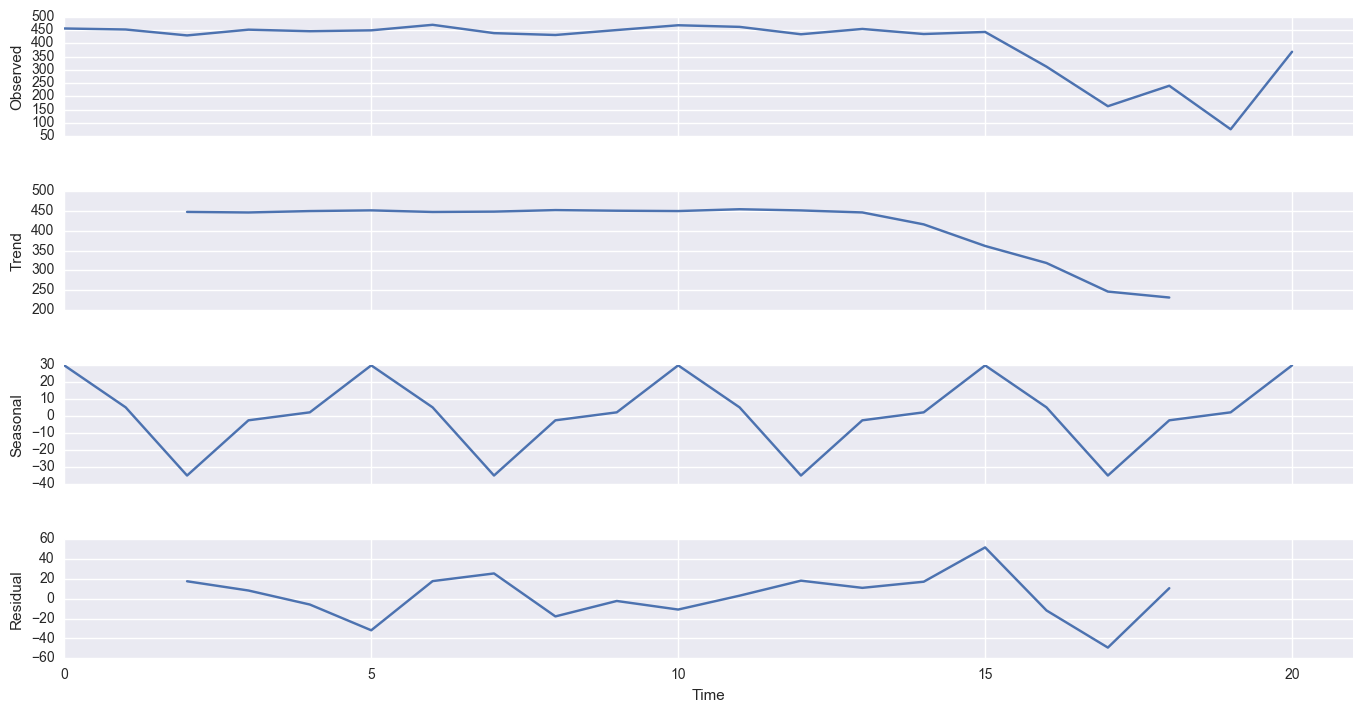

In [16]:
decomposition = sm.tsa.seasonal_decompose(data_spl_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 6: ** Descomposition of trends of the time of noise (particle count per 0.01 cubic feet) by days measured by sensor 0.